# 1. Data Exploration

## Loading and visualizing our data

In [26]:
import kagglehub
import os

dataset_path = "/kaggle/input/realwaste-main/RealWaste"

# Get the list of class names (subdirectories inside RealWaste)
waste_categories = sorted(os.listdir(dataset_path))

# Print the categories
print("Waste Categories:", waste_categories)

Waste Categories: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']


In [11]:
from random import sample
import pandas as pd

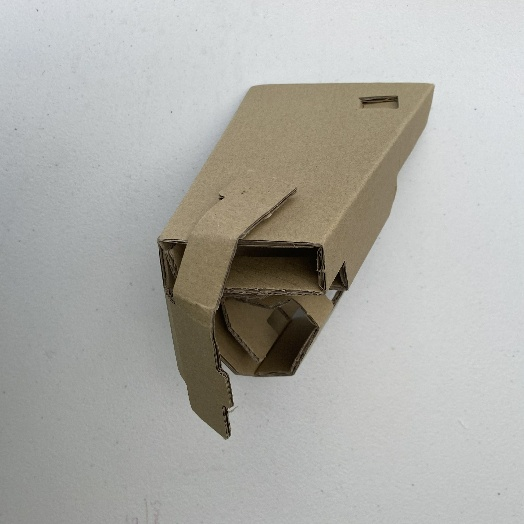

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img1 = load_img(f"{dataset_path}/Cardboard/Cardboard_10.jpg")
img1

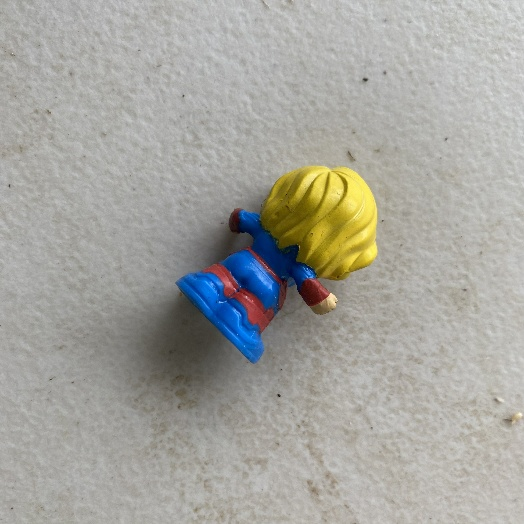

In [8]:
img2 = load_img(f"{dataset_path}/Miscellaneous Trash/Miscellaneous Trash_111.jpg")
img2

In [17]:
from PIL import Image  
import os
import matplotlib.pyplot as plt
from random import sample

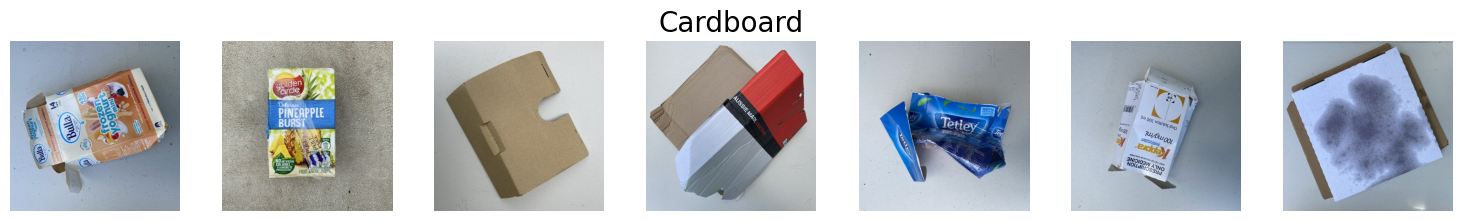

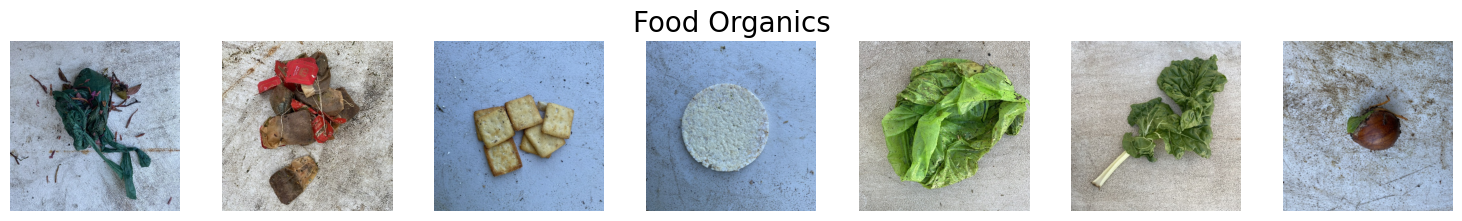

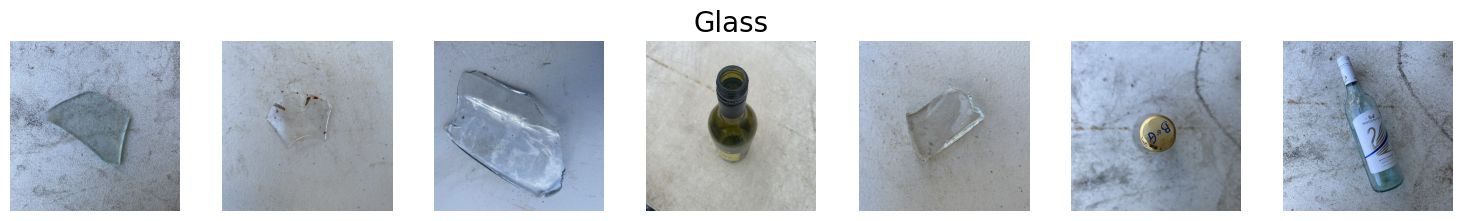

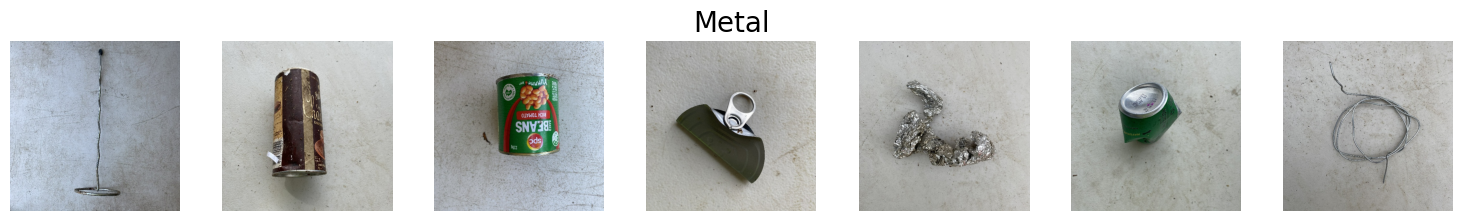

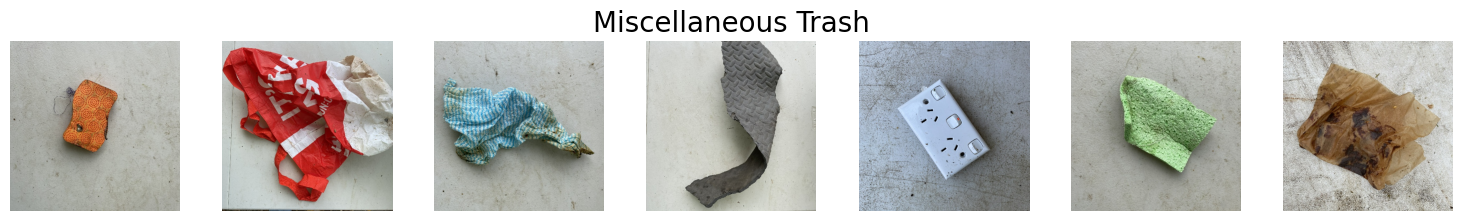

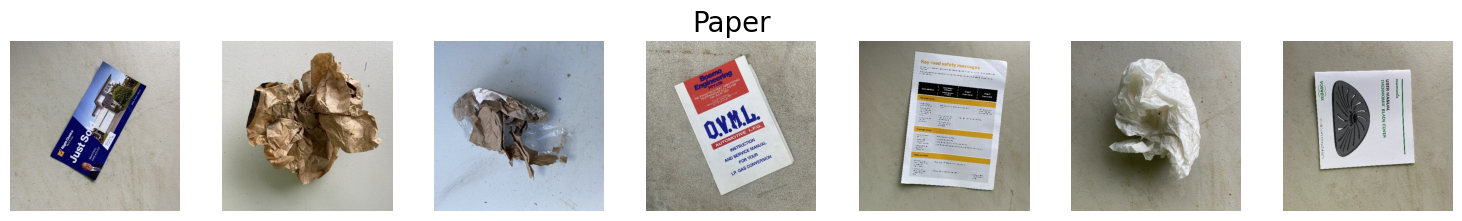

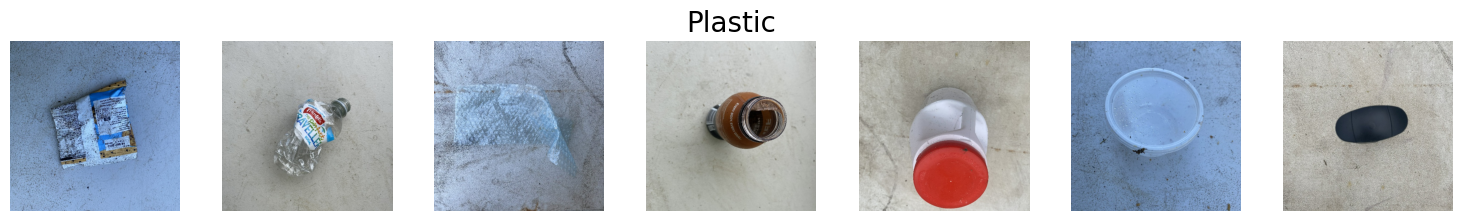

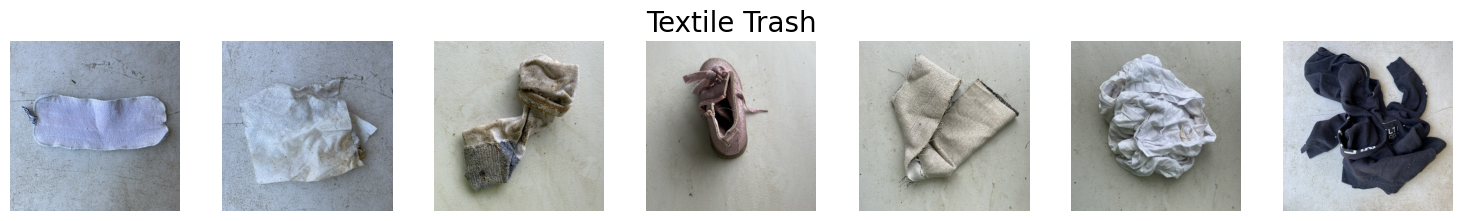

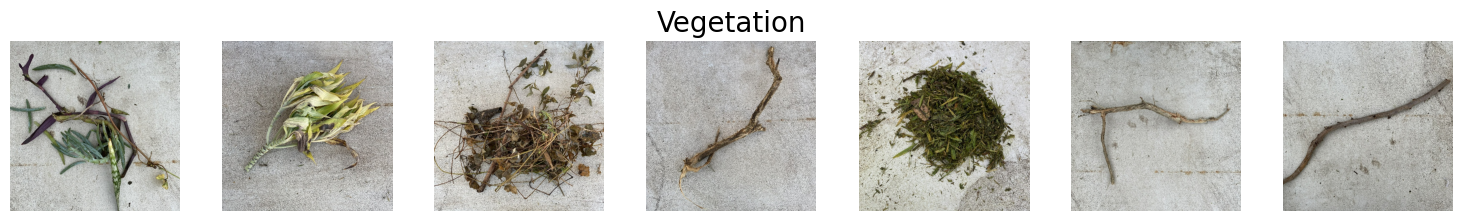

In [22]:
# Iterate over each trash type (folder) to display images
for waste_category in waste_categories:
    folder_path = os.path.join(dataset_path, waste_category)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select 7 random images
        image_files = sample(image_files,7)

        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(waste_category, fontsize=20, y=1.08)
        plt.show()

## Checking image dimensions, properties and class distribution

In [29]:
import os
from PIL import Image

## Check Image Dimensions Before Splitting

# Retrieve the names of all folders (waste categories)
waste_categories = os.listdir(dataset_path)

# Set to store unique image dimensions
all_dimensions_set = set()

# Iterate over each category (folder) to process images
for category in waste_categories:
    folder_path = os.path.join(dataset_path, category)

    # Verify it's a valid directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]

        # Display the count of images in the current folder
        print(f"{category} folder contains {len(image_files)} images.")

        # Loop through each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))

# Print summary of image dimensions
if len(all_dimensions_set) == 1:
    width, height, channels = all_dimensions_set.pop()
    print(f"\n✅ All images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\n⚠️ The images in the dataset have different dimensions or color channels:")
    print(all_dimensions_set)

Metal folder contains 790 images.
Glass folder contains 420 images.
Paper folder contains 500 images.
Vegetation folder contains 436 images.
Cardboard folder contains 461 images.
Textile Trash folder contains 318 images.
Food Organics folder contains 411 images.
Plastic folder contains 921 images.
Miscellaneous Trash folder contains 495 images.

✅ All images in the dataset have the same dimensions: 524x524 with 3 color channels.


## Creating a dataframe to prepare for preprocessing 

In [31]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each waste type and collect its images' file paths
for waste_category in waste_categories:
    for file in os.listdir(os.path.join(dataset_path, waste_category)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, waste_category, file), waste_category))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.sample(20)

filepath                label
4259  /kaggle/input/realwaste-main/RealWaste/Miscell...  Miscellaneous Trash
2161  /kaggle/input/realwaste-main/RealWaste/Cardboa...            Cardboard
1709  /kaggle/input/realwaste-main/RealWaste/Paper/P...                Paper
848   /kaggle/input/realwaste-main/RealWaste/Glass/G...                Glass
569   /kaggle/input/realwaste-main/RealWaste/Metal/M...                Metal
2118  /kaggle/input/realwaste-main/RealWaste/Vegetat...           Vegetation
1977  /kaggle/input/realwaste-main/RealWaste/Vegetat...           Vegetation
4162  /kaggle/input/realwaste-main/RealWaste/Plastic...              Plastic
892   /kaggle/input/realwaste-main/RealWaste/Glass/G...                Glass
1273  /kaggle/input/realwaste-main/RealWaste/Paper/P...                Paper
33    /kaggle/input/realwaste-main/RealWaste/Metal/M...                Metal
4687  /kaggle/input/realwaste-main/RealWaste/Miscell...  Miscellaneous Trash
4435  /kaggle/input/realwaste-main/RealWaste/Miscell...  Miscellaneous Trash
2838  /kaggle/input/realwaste-main/RealWaste/Textile...        Textile Trash
2936  /kaggle/input/realwaste-main/RealWaste/Food Or...        Food Organics
1017  /kaggle/input/realwaste-main/RealWaste/Glass/G...                Glass
1129  /kaggle/input/realwaste-main/RealWaste/Glass/G...                Glass
647   /kaggle/input/realwaste-main/RealWaste/Metal/M...                Metal
13    /kaggle/input/realwaste-main/RealWaste/Metal/M...                Metal
270   /kaggle/input/realwaste-main/RealWaste/Metal/M...                Metal

# 2. Data Preprocessing

In [32]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.model_selection import train_test_split

## Data Augmentation on Training Data

### Resizing, random flip, rotation, zoom, contrast & brightness, and translation

# 3. Data Preprocessing

In [33]:
!pip install split-folders

## Data splitting for model training

In [24]:
!pip install split-folders

In [27]:
import splitfolders

# Define destination (writable) directory in Kaggle
output_path = "/kaggle/working/RealWaste_split_data"

# Define split ratios
split_ratios = (0.7, 0.1, 0.2)  # Train: 70%, Val: 10%, Test: 20%

# Split the dataset
splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=split_ratios)

print("✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!")

Copying files: 4752 files [00:55, 85.51 files/s] 

✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!


## Define paths

In [28]:
# Define Paths for Your Dataset
train_data_dir = "/kaggle/input/realwaste/realwaste-main/RealWaste/train/"
val_data_dir = "/kaggle/input/realwaste/realwaste-main/RealWaste/val/"
test_data_dir = "/kaggle/input/realwaste/realwaste-main/RealWaste/test/"

# Define Batch Size
batch_size = 64

## Data Augmentation

In [31]:
# Data Augmentation (Applied Only to Training Set)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),  
    layers.RandomZoom(0.15),  
    layers.RandomContrast(0.1),  
    layers.RandomTranslation(0.15, 0.15),  
    layers.RandomBrightness(0.1),  
])

## Resizing + normalization

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras import layers

In [33]:
# Preprocessing (Resizing + Normalization)
preprocessing_layer = Sequential([
    layers.Resizing(224, 224),  # Ensure all images are the same size
    layers.Rescaling(1./255)    # Normalize pixel values from [0, 255] → [0, 1]
])

In [34]:
# Define Preprocessing Functions

# Apply Normalization + Augmentation for Training Set
def preprocess_train(image, label):
    image = preprocessing_layer(image)  # Resize + Normalize
    image = data_augmentation(image)    # Augment
    return image, label

# Apply Only Normalization for Validation/Test Sets
def preprocess_val_test(image, label):
    image = preprocessing_layer(image)  # Resize + Normalize
    return image, label

## Building the Dataset Pipeline: Loading, Augmentation & Preprocessing

In [35]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [36]:
# Training Data (With Augmentation)
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_train)

# Validation Data (No Augmentation)
val_ds = image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_val_test)

# Test Data (No Augmentation)
test_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_val_test)

print("✅ Datasets Ready: Training (with Augmentation), Validation & Test (only Normalization)")

NotFoundError: Could not find directory /kaggle/input/realwaste/realwaste-main/RealWaste/train/

# 4. Basic CNN Model Training

## Define Sequential CNN Model

In [ ]:
# Define CNN Model
model = Sequential([
    layers.Input((224, 224, 3)),  # Match the resized image shape

    # Feature Extraction
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    # Flatten for Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation="relu"),  # More neurons for learning complex patterns
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")  # 6 output classes (plastic, paper, etc.)
])

# Compile Model
adam = optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

# Show Model Summary
model.summary()

## Fine Tuning

In [ ]:
# Define Callbacks (To Improve Training)

MODEL_PATH = "best_model.keras"

modelCheckpoint = callbacks.ModelCheckpoint(
    MODEL_PATH, monitor="val_loss", verbose=0, save_best_only=True
)

LRreducer = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.1, patience=3, verbose=1, min_lr=0
)

EarlyStopper = callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=0, restore_best_weights=True
)

## Training

In [1]:
# Train the Model 🚀

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
)

print("🎉 Training Complete!")

NameError: name 'model' is not defined

# 5. Transfer Learning Model Training

In [ ]:
# Load the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(384, 384, 3))

# Freeze the layers up to conv4_block6_out
for layer in base_model.layers[:143]: # include the layer 142
    layer.trainable = False

In [ ]:
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
inputs = layers.Input(shape=(384, 384, 3))

x = data_augmentation(inputs) # We still have our data augmentation layers
x = preprocess_input(x) # Then a preprocessing layer specifically designed for the ResNet50 including scaling
x = base_model(x) # Then our transfer learning model

# Create the new model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
pred = Dense(6, activation='softmax')(x)

# We use the keras Functional API to create our keras model

custom_resnet50_model = Model(inputs=base_model.input , outputs=pred)


# Compile the model
custom_resnet50_model.compile(optimizer=Adam(learning_rate=0.0001),
                                loss='categorical_crossentropy',
                                metrics=['accuracy', 'recall', 'f1'])

custom_resnet50_model.summary()

In [ ]:
history = custom_resnet50_model.fit(
        train_ds,
        epochs=50,
        batch_size=32,
        validation_data=val_ds,
        class_weight=class_weights,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])


In [ ]:
MODEL = "custom_resnet50_model.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.5,
                                        patience=15,
                                        min_lr=0.00001)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       mode='min',
                                       patience=20,
                                       verbose=1,
                                       restore_best_weights=True)